# Корреляции

## **Тепловая карта**

<Axes: >

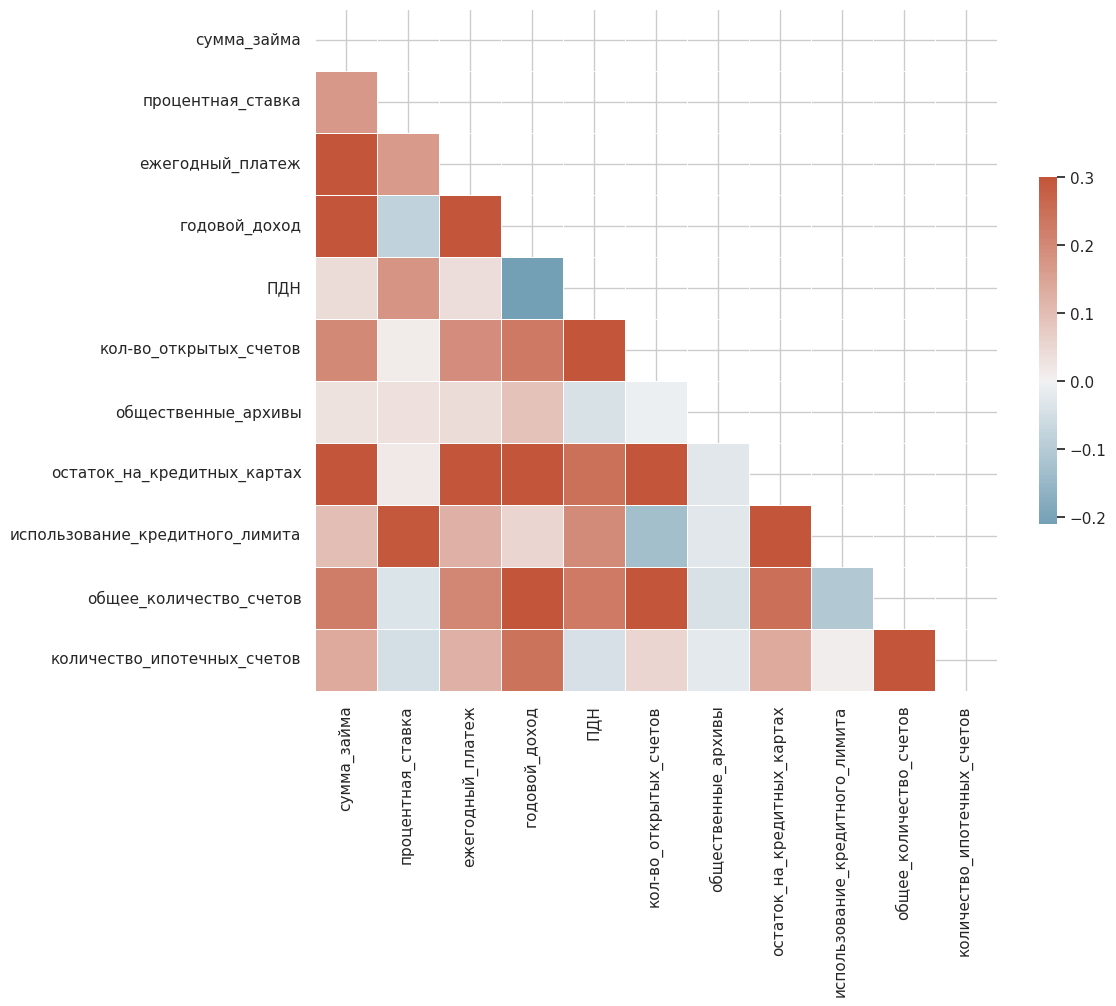

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel")

quantitative_columns = ['сумма_займа', 'процентная_ставка', 'ежегодный_платеж', 'годовой_доход', 'ПДН',
                         'кол-во_открытых_счетов', 'общественные_архивы', 'остаток_на_кредитных_картах',
                         'использование_кредитного_лимита', 'общее_количество_счетов', 'количество_ипотечных_счетов']

df_log_quantitative = df_log[quantitative_columns]

corr = df_log_quantitative.corr()
# mask generation
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Дополнительно к результату ранжирования коэффициента корреляции напрашивается предположение, что существует некоторая **отрицательная корреляция** между следующими переменными:

*  процентная ставка и общее количество счетов
*  процентная ставка и количество ипотечных счетов




## **Точечные диаграммы корреляций**

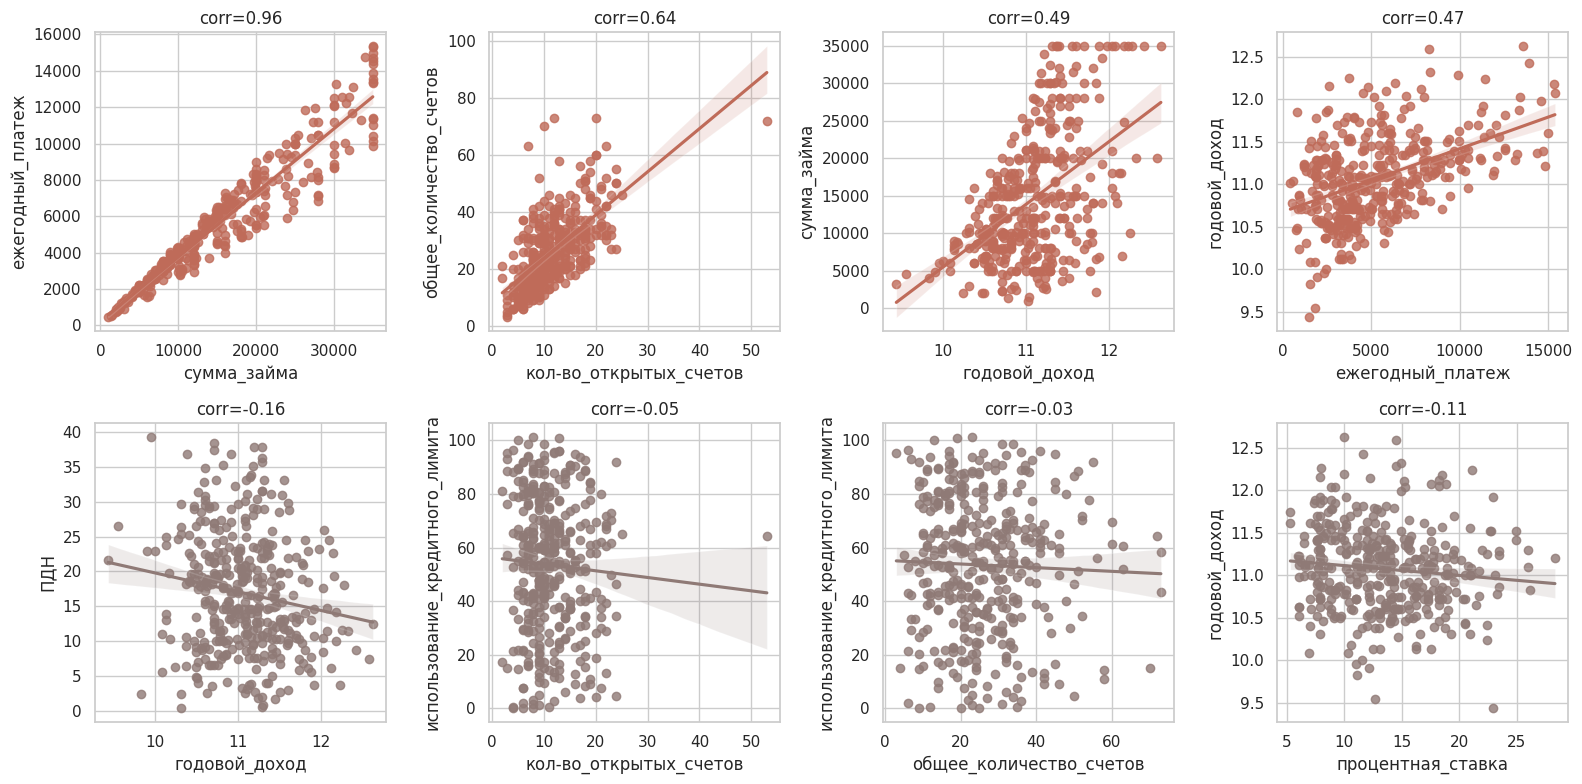

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_data = df_log.sample(n=400)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

point_color = '#bf6b59'
point_color_for_negative = '#8f7a76'

sns.regplot(ax=axs[0, 0], x="сумма_займа", y="ежегодный_платеж", data=sample_data, color=point_color)
axs[0, 0].set_title(f"corr={sample_data['сумма_займа'].corr(sample_data['ежегодный_платеж']):.2f}")

sns.regplot(ax=axs[0, 1], x="кол-во_открытых_счетов", y="общее_количество_счетов", data=sample_data, color=point_color)
axs[0, 1].set_title(f"corr={sample_data['кол-во_открытых_счетов'].corr(sample_data['общее_количество_счетов']):.2f}")

sns.regplot(ax=axs[0, 2], x="годовой_доход", y="сумма_займа", data=sample_data, color=point_color)
axs[0, 2].set_title(f"corr={sample_data['годовой_доход'].corr(sample_data['сумма_займа']):.2f}")

sns.regplot(ax=axs[0, 3], x="ежегодный_платеж", y="годовой_доход", data=sample_data, color=point_color)
axs[0, 3].set_title(f"corr={sample_data['ежегодный_платеж'].corr(sample_data['годовой_доход']):.2f}")

sns.regplot(ax=axs[1, 0], x="годовой_доход", y="ПДН", data=sample_data, color=point_color_for_negative)
axs[1, 0].set_title(f"corr={sample_data['годовой_доход'].corr(sample_data['ПДН']):.2f}")

sns.regplot(ax=axs[1, 1], x="кол-во_открытых_счетов", y="использование_кредитного_лимита", data=sample_data, color=point_color_for_negative)
axs[1, 1].set_title(f"corr={sample_data['кол-во_открытых_счетов'].corr(sample_data['использование_кредитного_лимита']):.2f}")

sns.regplot(ax=axs[1, 3], x="процентная_ставка", y="годовой_доход", data=sample_data, color=point_color_for_negative)
axs[1, 3].set_title(f"corr={sample_data['процентная_ставка'].corr(sample_data['годовой_доход']):.2f}")

sns.regplot(ax=axs[1, 2], x="общее_количество_счетов", y="использование_кредитного_лимита", data=sample_data, color=point_color_for_negative)
axs[1, 2].set_title(f"corr={sample_data['общее_количество_счетов'].corr(sample_data['использование_кредитного_лимита']):.2f}")

plt.tight_layout()
plt.show()

Только немногие графики демонстрируют линейную связь, но многих из них монотонны

Таким образом, безопаснее использовать тест Пирсона только для **ежегодного платежа&суммы займа** и **общего количества счетов&количества открытых счетов**, у которых связь неиболее близка к линейной

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [ ]:
positive_correlations = corr[(corr > 0.1) & (corr != 1.0)].unstack()

print("Наиболее сильные положительные корреляции:")
print(positive_correlations.sort_values(ascending=False)[:8])

Наиболее сильные положительные корреляции:
сумма_займа              ежегодный_платеж           0.953929
ежегодный_платеж         сумма_займа                0.953929
кол-во_открытых_счетов   общее_количество_счетов    0.680728
общее_количество_счетов  кол-во_открытых_счетов     0.680728
годовой_доход            сумма_займа                0.508693
сумма_займа              годовой_доход              0.508693
ежегодный_платеж         годовой_доход              0.490915
годовой_доход            ежегодный_платеж           0.490915
dtype: float64


In [ ]:
corr = df_log_quantitative.corr()
negative_correlations = corr[(corr < -0.1) & (corr != 1.0)].unstack()

print("\nНаиболее сильные отрицательные корреляции:")
print(negative_correlations.sort_values(ascending=True)[:6])


Наиболее сильные отрицательные корреляции:
годовой_доход                    ПДН                               -0.209592
ПДН                              годовой_доход                     -0.209592
кол-во_открытых_счетов           использование_кредитного_лимита   -0.131420
использование_кредитного_лимита  кол-во_открытых_счетов            -0.131420
                                 общее_количество_счетов           -0.104273
общее_количество_счетов          использование_кредитного_лимита   -0.104273
dtype: float64
